In [7]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import DBSCAN, KMeans
from sklearn.decomposition import PCA

In [2]:
datasets = pd.read_csv("/kaggle/input/2025-hearing-wellness-survey/Hearing well-being Survey Report.csv")
datasets.head()

,Perceived_Hearing_Meaning,Hearing_FOMO,Hearing_Test_Barrier,Missed_Important_Sounds,Left_Out_Due_To_Hearing,Daily_Headphone_Use,Belief_Early_Hearing_Care,Last_Hearing_Test_Method,Interest_in_Hearing_App,Desired_App_Features,Awareness_on_hearing_and_Willingness_to_invest,Paid_App_Test_Interest,Age_group,Ear_Discomfort_After_Use
0,"Staying independent and alert, Enjoying music,...",Sometimes,Cost,"Yes, in family conversations","Yes, often",My parent(s),5,"Self - application, Loved one, AI Support",Yes,"Privacy, Soft guidance, Visuals, Report sharin...",Yes,"Maybe, if it offers good value",18 - 24,No
1,"Staying independent and alert, Staying connect...",Rarely,Never felt the need,"Yes, in public spaces (trains, shops, announce...",Only in noisy places,My child/children,5,Self - application,Yes,Privacy,Yes,"No, I prefer getting tested at a hospital",18 - 24,Yes
2,"Staying independent and alert, I havenâ€™t tho...",Rarely,Shame,"Yes, during important work or school meetings",Sometimes,My parent(s),5,Self - application,Maybe,Soft guidance,No,"Yes, definitely",18 - 24,Maybe
3,Staying independent and alert,Yes often,Lack of awareness,"Yes, during important work or school meetings",Sometimes,1-2 hours,4,I've never taken a hearing test,"Yes, that would be helpful",Game-based interaction,Yes,"Yes, definitely",18 - 24,Occasionally
4,Staying independent and alert,Never,Lack of awareness,"No, I usually hear things well",Only in noisy places,Less than 1 hour,5,I've never taken a hearing test,"No, I don't think it's necessary","Quick tests, Game-based interaction, Detailed ...",No,"No, I prefer getting tested at a hospital",25 - 34,No


In [3]:
datasets.columns

Index(['Perceived_Hearing_Meaning', 'Hearing_FOMO', 'Hearing_Test_Barrier',
       'Missed_Important_Sounds', 'Left_Out_Due_To_Hearing',
       'Daily_Headphone_Use', 'Belief_Early_Hearing_Care',
       'Last_Hearing_Test_Method', 'Interest_in_Hearing_App',
       'Desired_App_Features',
       'Awareness_on_hearing_and_Willingness_to_invest',
       'Paid_App_Test_Interest', 'Age_group', 'Ear_Discomfort_After_Use'],
      dtype='object')

In [4]:
len(datasets)

387

In [5]:
datasets.Hearing_FOMO.value_counts()

Hearing_FOMO
Sometimes    148
Rarely       106
Never         94
Yes often     39
Name: count, dtype: int64

In [6]:
datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387 entries, 0 to 386
Data columns (total 14 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   Perceived_Hearing_Meaning                       387 non-null    object
 1   Hearing_FOMO                                    387 non-null    object
 2   Hearing_Test_Barrier                            385 non-null    object
 3   Missed_Important_Sounds                         387 non-null    object
 4   Left_Out_Due_To_Hearing                         387 non-null    object
 5   Daily_Headphone_Use                             387 non-null    object
 6   Belief_Early_Hearing_Care                       387 non-null    int64 
 7   Last_Hearing_Test_Method                        387 non-null    object
 8   Interest_in_Hearing_App                         387 non-null    object
 9   Desired_App_Features                            387 no

In [8]:
categorical_Column = []
for categorical_data in datasets.columns:
    
    if datasets[categorical_data].dtype == object:
        categorical_Column.append(categorical_data)
        datasets[categorical_data] = datasets[categorical_data].astype(str).str.strip()
        
datasets.head()

,Perceived_Hearing_Meaning,Hearing_FOMO,Hearing_Test_Barrier,Missed_Important_Sounds,Left_Out_Due_To_Hearing,Daily_Headphone_Use,Belief_Early_Hearing_Care,Last_Hearing_Test_Method,Interest_in_Hearing_App,Desired_App_Features,Awareness_on_hearing_and_Willingness_to_invest,Paid_App_Test_Interest,Age_group,Ear_Discomfort_After_Use
0,"Staying independent and alert, Enjoying music,...",Sometimes,Cost,"Yes, in family conversations","Yes, often",My parent(s),5,"Self - application, Loved one, AI Support",Yes,"Privacy, Soft guidance, Visuals, Report sharin...",Yes,"Maybe, if it offers good value",18 - 24,No
1,"Staying independent and alert, Staying connect...",Rarely,Never felt the need,"Yes, in public spaces (trains, shops, announce...",Only in noisy places,My child/children,5,Self - application,Yes,Privacy,Yes,"No, I prefer getting tested at a hospital",18 - 24,Yes
2,"Staying independent and alert, I havenâ€™t tho...",Rarely,Shame,"Yes, during important work or school meetings",Sometimes,My parent(s),5,Self - application,Maybe,Soft guidance,No,"Yes, definitely",18 - 24,Maybe
3,Staying independent and alert,Yes often,Lack of awareness,"Yes, during important work or school meetings",Sometimes,1-2 hours,4,I've never taken a hearing test,"Yes, that would be helpful",Game-based interaction,Yes,"Yes, definitely",18 - 24,Occasionally
4,Staying independent and alert,Never,Lack of awareness,"No, I usually hear things well",Only in noisy places,Less than 1 hour,5,I've never taken a hearing test,"No, I don't think it's necessary","Quick tests, Game-based interaction, Detailed ...",No,"No, I prefer getting tested at a hospital",25 - 34,No


In [9]:
datasets[categorical_data].head()

0              No
1             Yes
2           Maybe
3    Occasionally
4              No
Name: Ear_Discomfort_After_Use, dtype: object

In [10]:
encoding = OneHotEncoder(handle_unknown = "ignore", sparse = False)
X_data_method = encoding.fit_transform(datasets[categorical_Column])

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# PCA

In [11]:
pca_datasets = PCA(n_components =  2, random_state = 42)
x_datasets_2_dimentional_data = pca_datasets.fit_transform(X_data_method)
x_datasets_2_dimentional_data.shape

(387, 2)

# KMeans

In [12]:
kmeans_clustering = KMeans(n_clusters = 2, n_init = 10, random_state = 42)
kmeans_clustering_label_predictions = kmeans_clustering.fit_predict(X_data_method)
kmeans_clustering_label_predictions

array([0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,

# Silhouette Score

In [13]:
from sklearn.metrics import silhouette_score
silhouette_score_measure = silhouette_score(X_data_method,kmeans_clustering_label_predictions) if len(set(kmeans_clustering_label_predictions)) > 1 else np.nan

In [14]:
silhouette_score_measure

0.05714264091208161

In [15]:
x_datasets_2_dimentional_data[1:, 0]

array([-0.03646031,  0.00943393, -1.02271113,  2.06987567,  1.46137525,
       -1.14981617, -0.02311831, -0.99937389,  0.64421125, -0.08861079,
       -0.87526858, -0.92743963, -1.21895321, -0.57970149, -0.37705448,
       -0.67788992,  0.19745734, -1.04644935, -0.06183233, -0.2636753 ,
       -0.10175032, -0.28245447,  0.0844064 ,  0.27146077, -0.62837239,
        0.25750313, -0.67494999,  1.56748813, -1.12501811, -0.61032438,
        1.31473905, -0.67109242, -0.98373384, -0.90340415, -0.41773436,
        0.49091765, -1.38195922,  0.64516451, -1.08172419,  1.01381718,
        1.43761157, -0.5682287 , -0.43686348,  0.24093198, -0.03503912,
        1.45857918,  0.88202912, -0.79844025,  0.72943513, -0.5295307 ,
       -0.13297597,  0.03396762, -0.48364239,  0.20199087, -1.17220704,
       -0.64949198,  0.01425806, -0.2648383 , -0.94624   , -1.16330061,
        0.77895071, -1.52178388, -0.11883626, -1.03106602, -0.40640211,
       -1.36189817, -0.01698385, -0.65365025, -1.5333196 ,  0.43

In [17]:
import matplotlib.pyplot as plt

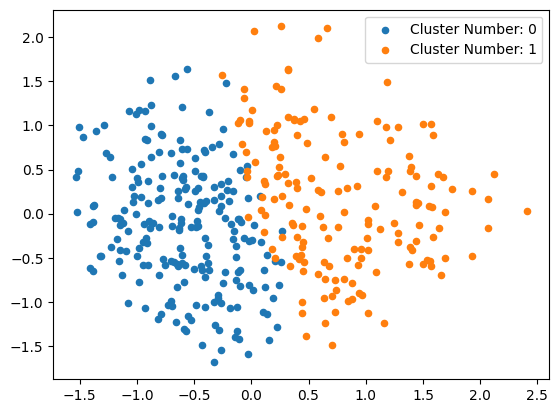

In [18]:
uniqueLabel = np.unique(kmeans_clustering_label_predictions)
plt.figure()

for label in uniqueLabel:
    plt.scatter(
    x_datasets_2_dimentional_data[kmeans_clustering_label_predictions == label, 0],
    x_datasets_2_dimentional_data[kmeans_clustering_label_predictions == label, 1],
    s = 20,
        label = f"Cluster Number: {label}"

    )

plt.title("")
plt.xlabel("")
plt.legend()
plt.show()

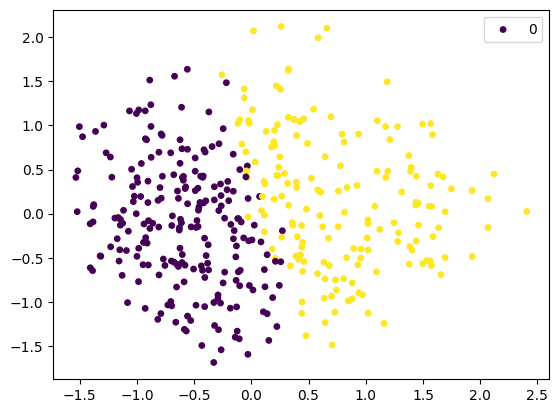

In [25]:
plt.figure()
plt.scatter(x_datasets_2_dimentional_data[:, 0],x_datasets_2_dimentional_data[:, 1], c = kmeans_clustering_label_predictions, s = 15)
plt.title("")
plt.xlabel("")

plt.legend([i for i in list(np.unique(kmeans_clustering_label_predictions))])
plt.show()

# DBSCAN

In [22]:
DBSCAN_clustering = DBSCAN(eps = 2.5, min_samples = 10)
DBSCAN_clustering_label_predictions = DBSCAN_clustering.fit_predict(X_data_method)
print(DBSCAN_clustering_label_predictions)

len(DBSCAN_clustering_label_predictions)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1

387

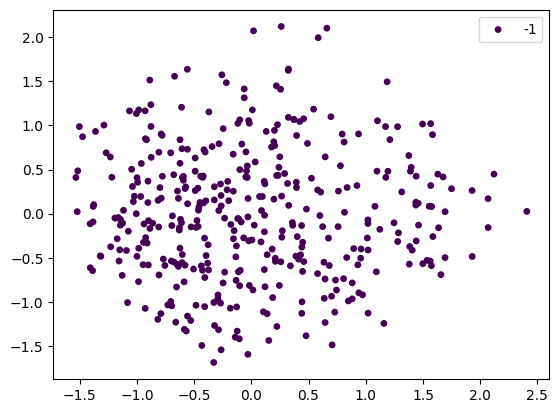

In [23]:
from sklearn.metrics import silhouette_score
silhouette_score_measure = silhouette_score(X_data_Mehthod, DBSCAN_clustering_label_predictions) if len(set(DBSCAN_clustering_label_predictions)) > 1 and  (set(DBSCAN_clustering_label_predictions)- {-1}) else np.nan

plt.figure()
plt.scatter(x_datasets_2_dimentional_data[:, 0],x_datasets_2_dimentional_data[:, 1], c = DBSCAN_clustering_label_predictions, s = 15)
plt.title("")
plt.xlabel("")
plt.legend(DBSCAN_clustering_label_predictions)
plt.show()

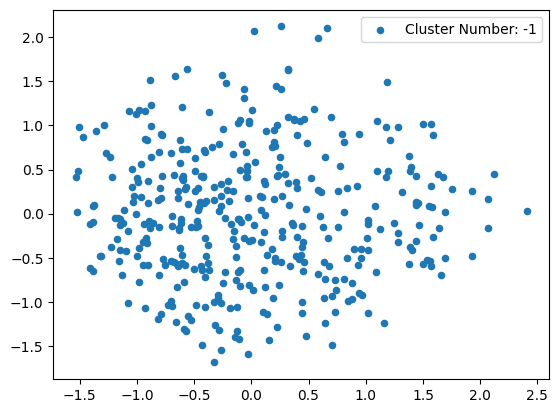

In [24]:
uniqueLabel = np.unique(DBSCAN_clustering_label_predictions)
plt.figure()

for label in uniqueLabel:
    plt.scatter(
    x_datasets_2_dimentional_data[DBSCAN_clustering_label_predictions == label, 0],
    x_datasets_2_dimentional_data[DBSCAN_clustering_label_predictions == label, 1],
    s = 20,
        label = f"Cluster Number: {label}"

    )

plt.title("")
plt.xlabel("")
plt.legend()
plt.show()